In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tweets = pd.read_csv("../data/tweets.csv")

In [3]:
tweets.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],
      dtype='object')

In [4]:
tweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [23]:
tweets.drop(['longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'], axis=1, inplace=True)

In [24]:
tweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,retweet_count,favorite_count
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,en,218,651
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,2445,5308
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,en,7834,27234
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,en,916,2542
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,en,859,2882


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6444 non-null   int64  
 1   handle                   6444 non-null   object 
 2   text                     6444 non-null   object 
 3   is_retweet               6444 non-null   bool   
 4   original_author          722 non-null    object 
 5   time                     6444 non-null   object 
 6   in_reply_to_screen_name  208 non-null    object 
 7   in_reply_to_status_id    202 non-null    float64
 8   in_reply_to_user_id      208 non-null    float64
 9   is_quote_status          6444 non-null   bool   
 10  lang                     6444 non-null   object 
 11  retweet_count            6444 non-null   int64  
 12  favorite_count           6444 non-null   int64  
 13  longitude                12 non-null     float64
 14  latitude                

In [15]:
tweets["handle"].value_counts()

HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64

In [32]:
tweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,retweet_count,favorite_count,month_tweeted
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,en,218,651,9
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,2445,5308,9
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,en,7834,27234,9
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,en,916,2542,9
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,en,859,2882,9


In [2]:
tweets_cleaned = pd.read_csv("../data/tweets_cleaned.csv")

In [8]:
tweets_cleaned.columns

Index(['Unnamed: 0', 'id', 'handle', 'text', 'is_retweet', 'original_author',
       'time', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'candidate_name'],
      dtype='object')

In [5]:
tweets_cleaned["handle"].unique()

array(['HillaryClinton', 'realDonaldTrump'], dtype=object)

In [9]:
tweets_cleaned.loc[tweets_cleaned["handle"] == "realDonaldTrump", "candidate_name"] = "Donald Trump"

In [10]:
tweets_cleaned["candidate_name"].unique()

array(['Hillary Clinton', 'Donald Trump'], dtype=object)

In [12]:
tweets_cleaned.to_csv("../data/tweets_cleaned.csv")

In [14]:
tweets_cleaned_hc = tweets_cleaned[tweets_cleaned["handle"] == "HillaryClinton"].copy()

In [15]:
tweets_cleaned_dt = tweets_cleaned[tweets_cleaned["handle"] == "realDonaldTrump"].copy()

In [17]:
tweets_cleaned_3 = pd.concat([tweets_cleaned_hc, tweets_cleaned_dt])

In [35]:
tweets_cleaned_3.to_csv("../data/tweets_cleaned_3.csv", index=False)

In [4]:
tweets_cleaned_3 = pd.read_csv("../data/tweets_cleaned_3.csv")

In [5]:
tweets_cleaned_3.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'candidate_name', 'log_retweet_cts',
       'log_favorite_ct'],
      dtype='object')

In [6]:
retweet_ct = np.array(tweets_cleaned_3["retweet_count"])
favorite_ct = np.array(tweets_cleaned_3["favorite_count"])

In [7]:
tweets_cleaned_3["log_retweet_cts"] = np.log10(retweet_ct)
tweets_cleaned_3["log_favorite_ct"] = np.log10(favorite_ct)

In [8]:
tweets_handle_origin = tweets_cleaned_3[tweets_cleaned_3["original_author"].isna()].copy()

In [9]:
len(tweets_cleaned_3["original_author"])

6444

In [10]:
len(tweets_handle_origin["original_author"])

5722

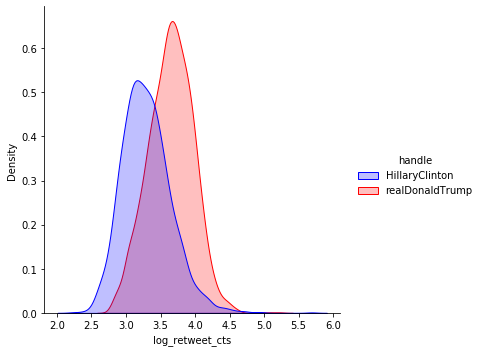

In [11]:
retweet_plot = sns.displot(data=tweets_handle_origin, x="log_retweet_cts", hue="handle", kind="kde", fill=True, 
            palette={"HillaryClinton":"blue", "realDonaldTrump":"red"})
retweet_plot.savefig("../plots/retweet_plot.png")

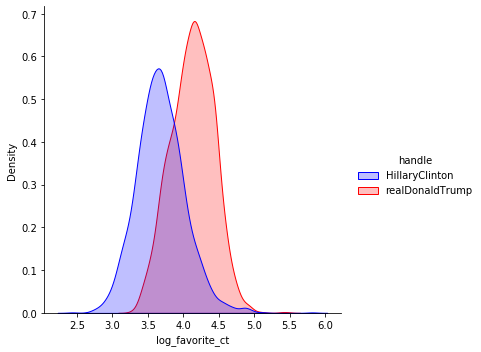

In [12]:
fave_plot = sns.displot(data=tweets_handle_origin, x="log_favorite_ct", hue="handle", kind="kde", fill=True, 
            palette={"HillaryClinton":"blue", "realDonaldTrump":"red"})
fave_plot.savefig("../plots/favorite_plot.png")

In [29]:
from collections import Counter

In [32]:
Counter(" ".join(tweets_cleaned_3[tweets_cleaned_3["handle"] == "realDonaldTrump"]["text"]).split()).most_common(100)

[('the', 1509),
 ('to', 1067),
 ('and', 868),
 ('in', 831),
 ('I', 819),
 ('a', 792),
 ('is', 737),
 ('of', 719),
 ('on', 567),
 ('for', 549),
 ('will', 513),
 ('you', 509),
 ('be', 462),
 ('Thank', 447),
 ('that', 342),
 ('#Trump2016', 337),
 ('Hillary', 294),
 ('@realDonaldTrump', 292),
 ('with', 290),
 ('-', 288),
 ('are', 274),
 ('at', 271),
 ('&amp;', 259),
 ('have', 254),
 ('The', 236),
 ('was', 230),
 ('Trump', 219),
 ('by', 216),
 ('#MakeAmericaGreatAgain', 216),
 ('great', 209),
 ('has', 197),
 ('my', 197),
 ('not', 196),
 ('all', 188),
 ('me', 187),
 ('Crooked', 176),
 ('from', 172),
 ('he', 172),
 ('so', 169),
 ('it', 168),
 ('our', 166),
 ('Cruz', 163),
 ('people', 149),
 ('who', 145),
 ('just', 142),
 ('out', 141),
 ('Clinton', 140),
 ('We', 139),
 ('this', 134),
 ('New', 129),
 ('we', 126),
 ('as', 126),
 ('very', 126),
 ('am', 124),
 ('you!', 119),
 ('her', 118),
 ('about', 117),
 ('his', 116),
 ('Great', 115),
 ('AMERICA', 114),
 ('they', 112),
 ('like', 109),
 ('Ted', 

In [33]:
Counter(" ".join(tweets_cleaned_3[tweets_cleaned_3["handle"] == "HillaryClinton"]["text"]).split()).most_common(100)

[('to', 1703),
 ('the', 1621),
 ('a', 1017),
 ('and', 915),
 ('of', 866),
 ('in', 713),
 ('for', 687),
 ('is', 618),
 ('Trump', 598),
 ('on', 501),
 ('Donald', 369),
 ('that', 360),
 ('our', 360),
 ('we', 345),
 ('you', 344),
 ('be', 318),
 ('—Hillary', 301),
 ('Hillary', 281),
 ('with', 280),
 ('We', 263),
 ('not', 254),
 ('have', 245),
 ('his', 243),
 ('who', 237),
 ('are', 237),
 ('this', 231),
 ('about', 220),
 ('can', 197),
 ('has', 195),
 ('as', 191),
 ('I', 190),
 ('it', 189),
 ('he', 173),
 ('your', 169),
 ('will', 167),
 ('make', 166),
 ('from', 161),
 ('all', 158),
 ('what', 151),
 ('just', 149),
 ('at', 146),
 ('people', 146),
 ("Trump's", 141),
 ('more', 139),
 ('The', 134),
 ('one', 132),
 ('should', 128),
 ('do', 126),
 ('by', 125),
 ('their', 124),
 ('would', 119),
 ('than', 118),
 ('her', 118),
 ('need', 118),
 ('"I', 110),
 ('was', 109),
 ('an', 108),
 ('-H', 105),
 ('us', 103),
 ('America', 99),
 ('like', 98),
 ('out', 97),
 ('president', 96),
 ('if', 93),
 ('no', 93)